# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [107]:
# откройте данные: ваш код здесь
df = pd.read_csv('data/spam_or_not_spam.csv')
df.head(3)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0


In [108]:
# рассчитайте частоты для классов : ваш код здесь
label_count = df['label'].value_counts() / df.shape[0] * 100
print(label_count)
print('Количество спам-писем', df[df['label'] == 1]['label'].count())
print('Количество не спам-писем', df[df['label'] == 0]['label'].count())

0    83.333333
1    16.666667
Name: label, dtype: float64
Количество спам-писем 500
Количество не спам-писем 2500


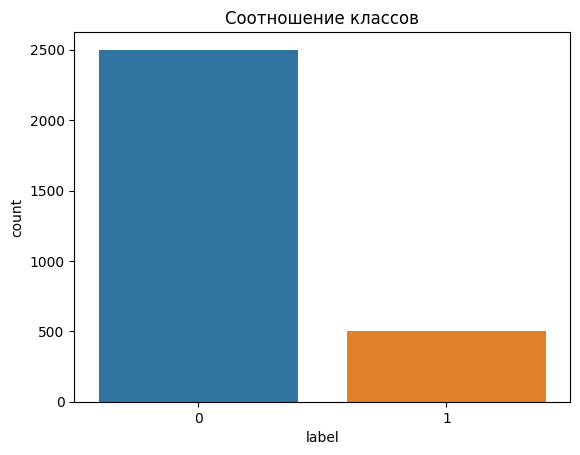

In [109]:
# визуализируйте результат: ваш код здесь
sns.countplot(data=df, x='label').set(title = 'Соотношение классов');

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [110]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [111]:
#ваш код здесь
df = df.replace('^\s*$', np.NaN, regex=True)
df = df.fillna(np.nan)
df = df.dropna()

Переводим данные в векторный вид:

In [112]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [113]:
#ваш код здесь
print('В наборе данных получилось', X.shape[1], 'признаков')

В наборе данных получилось 34116 признаков


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [114]:
#ваш код здесь
y = df['label']

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [115]:
#ваш код здесь

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [116]:
#ваш код здесь
print('Среднее значение целевой переменной по тестовой выборке:', round(y_test.mean(), 3))

Среднее значение целевой переменной по тестовой выборке: 0.165


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [117]:
#ваш код здесь

complement_nb = ComplementNB(alpha=0.01)
complement_nb.fit(X_train, y_train)
y_train_pred = complement_nb.predict(X_train)
y_test_pred = complement_nb.predict(X_test)
y_test_pred_proba = complement_nb.predict_proba(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [118]:
#ваш код здесь

print('Accuracy на тестовой выборке', round(metrics.accuracy_score(y_test, y_test_pred), 3))
print('Precision на тестовой выборке', round(metrics.precision_score(y_test, y_test_pred), 3))
print('Recall на тестовой выборке', round(metrics.recall_score(y_test, y_test_pred), 3))
print('F1-score на тестовой выборке', round(metrics.f1_score(y_test, y_test_pred), 3))

Accuracy на тестовой выборке 0.988
Precision на тестовой выборке 1.0
Recall на тестовой выборке 0.927
F1-score на тестовой выборке 0.962


Нарисуйте ROC-кривую:

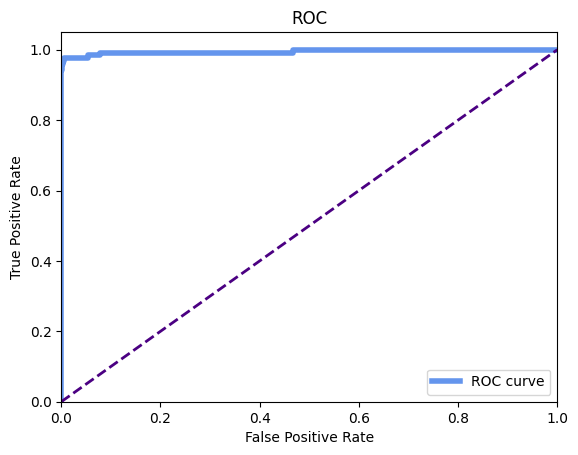

No Skill: ROC AUC=0.99507
Naive Bayes: ROC AUC=0.50000


In [121]:
#ваш код здесь

fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba[:,1], drop_intermediate=False)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color="cornflowerblue", lw=4,  label="ROC curve")
plt.plot([0, 1], [0, 1], color="indigo", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

print('No Skill: ROC AUC=%.5f' % (roc_auc))
print('Naive Bayes: ROC AUC=%.5f' % 0.5)

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

Наилучшие значения параметров: {'alpha': 0.2}
F1-score на тестовой выборке 0.983739837398374


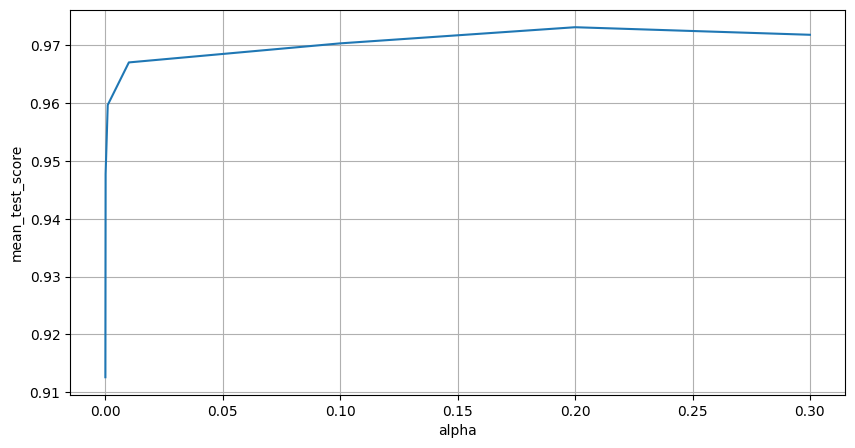

In [122]:
#ваш код здесь
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]}

grid_search = GridSearchCV(
    estimator=ComplementNB(), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1,
    scoring='f1'
)
grid_search.fit(X_train, y_train) 
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))

y_test_pred = grid_search.predict(X_test)
y_test_pred_proba = grid_search.predict_proba(X_test)
print('F1-score на тестовой выборке', metrics.f1_score(y_test, y_test_pred))

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=param_grid['alpha'], y=grid_search.cv_results_['mean_test_score'])
ax.set_xlabel('alpha')
ax.set_ylabel('mean_test_score')
ax.grid()